In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download solarmainframe/ids-intrusion-csv

ids-intrusion-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip ids-intrusion-csv.zip

Archive:  ids-intrusion-csv.zip
replace 02-14-2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from google.colab import files

In [ ]:
day1 = pd.read_csv("/content/02-14-2018.csv")

day2 = pd.read_csv("/content/02-15-2018.csv")

day3 = pd.read_csv("/content/02-16-2018.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
index_val = day3[day3["Label"]=="Label"].index
day3.drop(index_val, inplace=True)

In [ ]:
# df.to_csv('preprocessed_dataset.csv', encoding = 'utf-8-sig') 
# files.download('preprocessed_dataset.csv')

In [ ]:
df = pd.concat([day1,day2,day3], ignore_index=True)
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [ ]:
df['Label'].unique()
df.reset_index(inplace = True, drop = True)

In [ ]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

Benign                      10990
DoS attacks-GoldenEye       10990
DoS attacks-Hulk            10990
DoS attacks-SlowHTTPTest    10990
DoS attacks-Slowloris       10990
FTP-BruteForce              10990
SSH-Bruteforce              10990
Name: Label, dtype: int64


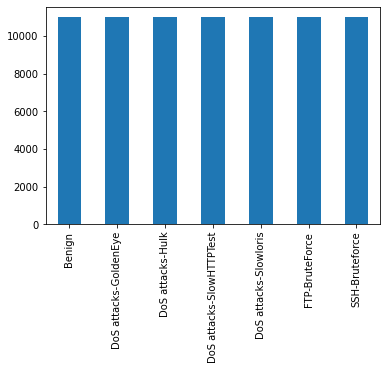

In [ ]:
y_resampled.value_counts().plot.bar()
print(y_resampled.value_counts())

In [ ]:
X_resampled.shape, y_resampled.shape

((76930, 79), (76930,))

In [ ]:
final_data = X_resampled
final_data['Label'] = y_resampled
final_data.drop(['Labels'], axis=1, inplace=True)
final_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52725,6,15/02/2018 05:08:07,168,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,80,6,14/02/2018 09:45:27,5729899,4,4,97,232,97,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,443,6,14/02/2018 12:15:14,60873594,13,15,371,3219,239,0,...,20,93010.166667,61386.091628,218314,67933,10008518.166667,3328.026107,10009901,10001725,Benign
3,53,17,14/02/2018 02:53:42,30733,1,1,32,48,32,32,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,15/02/2018 09:37:59,5239954,8,9,956,5519,631,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [ ]:
final_data.to_csv('day123_preprocessed_dataset.csv', encoding = 'utf-8-sig') 
files.download('day123_preprocessed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>